In [2]:
import math
#import pyxfoil
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

# EAE 127 Project 4 Supplement - Vortex Panel Method

### Problem 1 - Vortex Potential Flow Solutions

&nbsp; &nbsp; &nbsp; &nbsp; In Project 2 we used potential flow methods to create sources and sinks. Now, we'll use similar methods to create potential flow solutions involving vortices. Let's take a look at how to do this by revisiting our potential flow functions from Project 2.

We should adjust the functions we used to determine the velocity within our mesh grid due to the placement of a vortex. For a vortex, the velocity components u and v are as follows:

$$u(x, y) = \frac{\Gamma}{2 \pi} \frac{y}{x^2 + y^2}$$

$$v(x, y) = -\frac{\Gamma}{2 \pi} \frac{x}{x^2 + y^2}$$

> We'll need to make a small change to the above equations. The values for x and y are equal to the following:

$$x = X - x_{v} $$

$$y = Y - y_{v} $$

Where X and Y are your meshgrid variables, and x_v and y_v are the locations where you would like to place your source and sink. 

Input these values into the below function and return u and v. In this case, we can ignore the stream function psi, as we will not need the contours or dividing streamline for this project. 



In [ ]:
def get_vortex_velocity(Gamma, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex
    
    Parameters
    ----------
    Gamma: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    u = + 

    # Here, input the equation for v_vortex from the equations above
    v = -
    
    return u, v



SyntaxError: invalid syntax (<ipython-input-157-202cafb5dd10>, line 26)

Once you have set up the above equations. Repeat the methods from Project 2 to create and define a meshgrid, define a strength for your vortex $\Gamma$ and choose a location for where to place the vortex. Plot the vortex and adjust your plot limits so that the vortex is clearly visible. This will be your 1st superposition plot for problem 1. Once you are happy with the plot of your vortex, create a sink using the methods from project 2 and create a superposition of your vortex and sink to create the 2nd superposition plot. 


### Finite Vortex Sheet

Problem 1 asks you to create a vortex sheet of 12 vortices. To create this finite vortex sheet we will again employ some methods from Project 2. In Project 2, we use a for loop to quickly add together the contributions from many sources and sinks. Here, we will do the same thing with our row of 12 vortices. Let's start by looking at the equations for a row of vortices as opposed to just a single vortex. 

$$u(x, y) = \frac{\Gamma}{2 \pi} \sum_{i = 1}^{N} \frac{Y - y_{i}}{(X - x_{i})^2 + (Y - y_{i}))^2}$$

$$v(x, y) = -\frac{\Gamma}{2 \pi} \sum_{i = 1}^{N} \frac{X - x_{i}}{(X - x_{i})^2 + (Y - y_{i}))^2}$$

Where X and Y are again your meshgrid variables, $x_{i}$ and $y_{i}$ are the locations of your vortices. As you can see above, the summation of the location terms makes our implementation a little complex. Here is what you should do in order to adjust the get_vortex_velocity function. 
> Copy the function over and rename it

> Remove the input Gamma, so that you only input xv, yv, X and Y into the function.

> Remove the $\frac{\Gamma}{2\pi}$ 

This way, your function only computes the distance terms from the above equations. We will add these distance terms together to accomplish the summation in the equations. We'll do this using a for loop. Lets take a look at our for loop from Project 2. Some of the unecessary elements have been removed. Instead of determining u(x,y) and v(x,y) we need to determine the summation for each velocity component first. We'll do this using sumU and sumV. After we determine these values we will multiply the summation by $\frac{\Gamma}{2\pi}$



In [ ]:
def get_sum_locations(xv, yv, X, Y):
    """
    Parameters
    ----------
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    sumU = 

    # Here, input the equation for v_vortex from the equations above
    sumV = 
    
    return sumU, sumV


SyntaxError: invalid syntax (<ipython-input-77-2dabdb55c450>, line 48)

### Infinite Vortex Sheet

The Infinite Vortex sheet is a little different than the others. There's no way to describe the geometry for an infinite row of vortices through adding the points through superposition, we would be adding points/vortices forever. Instead, we use closed form solutions to define the velocity points as though there were an infinite row of vortices. To calculate the velocity within our meshgrid, we would use the following equations.

$$u(x, y) = \frac{\Gamma}{2 a} \frac{sinh \frac{2 \pi y}{a}}{cosh \frac{2 \pi y}{a} - cos\frac{2 \pi x}{a}}$$

$$v(x, y) = -\frac{\Gamma}{2 a} \frac{sin \frac{2 \pi x}{a}}{cosh \frac{2 \pi y}{a} - cos\frac{2 \pi x}{a}}$$

In this case, we don't need to worry about where we are placing our flows. In the above equation, x and y simply represent our meshgrid variables X and Y. a is a new variable that we will use to describe the spacing between our vortices. Let's try this out.


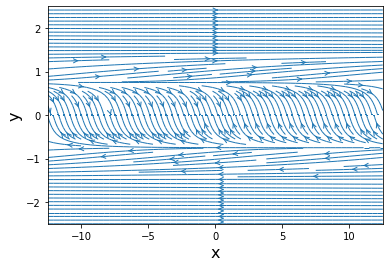

In [ ]:
def infinite_vortex_vel(Gamma, a, X, Y):
    """
    Parameters
    ----------
    a: float
        Spacing between the vortices
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # Here, input the equation for u_vortex from the equations above
    u =

    # Here, input the equation for v_vortex from the equations above
    v =
    
    return u, v

# add your setup here

u, v = infinite_vortex_vel()


plt.figure()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.show()


### Problem 2 - Setting up the Vortex Panel Method

&nbsp; &nbsp; &nbsp; &nbsp; In Project 3 we expanded our potential flow methods to use predefined geometries rather than creating those geometries using sources and sinks. We did this using the source panel method. Based on the results of our source panel method, we found that source panel methods cannot adequately determine lift for cambered airfoils. The reason for this is that our source panel methods do not incorporate or include circulation. In order to compute circulation, we will need to develop a more advanced analysis method called vortex panel method. Fortunately, we can reuse some of the methods we developed for our source panel method code. In order to adequately determine lift using these panel methods, we will also need to enforce the Kutta-condition which comes from the Kutta-Joukowski theorem of lift calculation. 

To briefly touch on the Kutta-condition, this is a theory that states that the pressure below and above the trailing edge of an airfoil must be equal to ensure that flow does not bend around the final point of the airfoil. This ensures that flow leaves the airfoil smoothly. 

So how will we enforce the Kutta-condition? In our last project we created a system of equations with N equations and N unknowns. We will be adding an extra equation so that we have N+1 equations and N+1 unknowns to solve. Let's revisit some of our functions from Project 3. 

In [ ]:
class Panel:
    """
    Here, we are creating a panel object and all its necessary information. 
    """

    def __init__(self, xa, ya, xb, yb):
        """
        Initialization of the panel.

        Here, we write a specific piece of code to be run everytime we create a panel object. In a general sense, the "init" command/function
        will be run every time that we create a new panel.

        Our code needs to calculate the center point of the panel, the length, and its angle.

        Our code also needs to make space for the source strength, tangential velocity, and pressure coefficient
        (which we will define for a specific panel later)
        
        Parameters:
        -----------
        xa: float
            x - coordinate of the first end point
        ya: float
            y - coordinate of the first end point
        xb: float
            x - coordinate of the second end point
        yb: float
            y - coordinate of the second end point
        xc: float
            x - coordinate of the center point of the panel
        yc: float
            y - coordinate of the center point of the panel 
        length: float
            length of the panel
        beta: float
            orientation/angle of the panel

        These parameters are not defined until later. We set them equal to zero below. 
        sigma: float
            source sheet strength
        vt: float
            velocity tangential to the panel
        cp: float
            pressure coefficient


        """

        self.xa, self.ya = xa, ya           # Defines the first end point
        self.xb, self.yb = xb, yb           # Defines the second end point

        # Defining center point and panel parameters
        # You will need to define these yourself:
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2         # Control point or center point 
        self.length = np.sqrt((xa-xb)**2 + (ya-yb)**2)          # Length of the panel 

        # For the orientation of the panel (angle between x axis and the unit vector normal to the panel)
        if xb - xa <= 0:
            self.beta = ##your calculation here##
        elif xb - xa > 0:
            self.beta = ##your calculation here##

        # Location of the panel (we will use this later when we expand our analys to airfoils)
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'

        # We also need 3 more parameters, sigma, vt for tangential velocity, and cp for pressure distribution. 
        # Create these and set the equal to zero for now

        self.sigma = 0.0 
        self.vt = 0.0
        self.cp = 0.0



def define_panels(x, y, N=40):
    """
    Discretizes the geometry into panels using the 'cosine' method.
    
    Parameters
    ----------
    x: 1D array of floats
        x-coordinate of the points defining the geometry.
    y: 1D array of floats
        y-coordinate of the points defining the geometry.
    N: integer, optional
        Number of panels;
        default: 40.
    
    Returns
    -------
    panels: 1D Numpy array of Panel objects
        The discretization of the geometry into panels.
    """
    R = (x.max() - x.min()) / 2  # radius of the circle
    x_center = (x.max() + x.min()) / 2  # x-coord of the center
    # define x-coord of the circle points
    x_circle = x_center + R * np.cos(np.linspace(0.0, 2 * math.pi, N + 1))
    
    x_ends = np.copy(x_circle)  # projection of the x-coord on the surface
    y_ends = np.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x = np.append(x, x[0])
    y = np.append(y, y[0])


    test = len(x_ends)
    for i in range(0, test-1):
        if (x_ends[i] < min(x)):
            x_ends[i] = min(x)

 
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x) - 1:
            if (x[I] <= x_ends[i] <= x[I + 1]) or (x[I + 1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        # Interpoaltion Process (Finding Y Points)   
        a = (y[I + 1] - y[I]) / (x[I + 1] - x[I])
        b = y[I + 1] - a * x[I + 1]
        y_ends[i] = a * x_ends[i] + b
        

    y_ends[N] = y_ends[0]
    print(y_ends)
    
    panels = np.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
    return panels

The above two functions should look pretty familiar so far. Remember that we need to use the define_panels() function on some airfoil geometry and it will create a certain number of Panel objects. Each Panel object will have a surface pressure ($C_{p}$), a tangential velocity ($V_{t}$) and a source strength ($\sigma$) associated with it. In order to figure out these values for each panel, we used the two following equations. 

Normal: $$ u_{n_{i}} = U_{\infty}cos(\beta_{i}) + \frac{\sigma_{i}}{2} + \sum_{j=1 , j \neq i }^{N_{p}} \frac{\sigma_{j}}{2\pi} \int  \frac{(x_{c_{i}} - x_{j}(s_{j}))cos\beta_{i}  + (y_{c_{i}} - y_{j}(s_{j}))sin\beta_{i} } {(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j}  $$

Tangential: $$ u_{t_{i}} = -U_{\infty}sin(\beta_{i}) + \sum_{j=1 , j \neq i }^{N_{p}} \frac{\sigma_{j}}{2\pi} \int  \frac{(x_{c_{i}} - x_{j}(s_{j}))(-sin\beta_{i})  + (y_{c_{i}} - y_{j}(s_{j}))cos\beta_{i} } {(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j}  $$

In both situations we use the above equations to create a system of linear equations and solve them using linear algebra function included in python. In order to move from the above equations that describe the source panel method, we will need to add some terms and adjust the equations. Lets see how this can be done. Starting with the Normal Velocity equation. In Project 3 we described the equations using a source strength $\sigma$ for each panel. For the vortex panel we will add a constant vortex strength $\gamma$ for each panel. This will introduce some new terms to our equation for normal velocity at a panel. Lets take a look at the potential flow function we will be working with:

$$ \phi(x_{c_{i}} , y_{c_{i}}) = V_{\infty}x_{c_{i}}cos(\alpha) + V_{\infty}y_{c_{i}}sin(\alpha) + \sum_{j=1}^{N} \frac{\sigma_{j}}{2 \pi} \int ln\sqrt{(x_{c_{i}} - x_{j}(s_{j}))^2 + (y_{c_{i}} - y_{j}(s_{j}))^2} ds_{j}- \sum_{j=1}^{N} \frac{\gamma}{2 \pi} \int tan^{-1} (\frac{y_{c_{i}} - y_{j}(s_{j})}{x_{c_{i}} - x_{j}(s_{j})})\,ds_{j}  $$

Let's take the derivative of the potential function with respect to the direction normal to a panel: 

$$u_{n_{i}} = \frac{\partial}{\partial n_{i}} \left \{  \phi (x_{c} , y_{c}) \right \} = 0$$

Remember that in order for our flow to be tangent to the panel orientation, the velocity in the normal direction must be 0. Once we perform this derivative we arrive at the equation below:

$$ u_{n_{i}} = V_{\infty}cos(\alpha - \beta_{i}) + \frac{\sigma_{i}}{2} + + \sum_{j=1}^{N} \frac{\sigma_{j}}{2 \pi} \int \frac{\partial}{\partial n_{i}}  ln\sqrt{(x_{c_{i}} - x_{j}(s_{j}))^2 + (y_{c_{i}} - y_{j}(s_{j}))^2} \,ds_{j} - \sum_{j=1}^{N} \frac{\gamma}{2 \pi} \int \frac{\partial}{\partial n_{i}} tan^{-1} (\frac{y_{c_{i}} - y_{j}(s_{j})}{x_{c_{i}} - x_{j}(s_{j})})\,ds_{j}  $$

We worked through the first integral for the source strength of each panel in Project 3. You can reference the Project 3 Supplement in order to see how we arrive at the last equation. We can work through the last integral by taking the derivative of the arctangent terms:

$$\frac{\partial}{\partial n_{i}} tan^{-1} \frac{y_{c_{i}} - y_{j}(s_{j})}{x_{c_{i}} - x_{j}(s_{j})} = \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2}$$

This should give us the following equation for the normal velocity. Our last step is to replace the derivative terms in the numerator. Notice that the terms within the integrands are very simialar, but differ with the placement of these derivatives. You can reference the Project 3 Supplement to see what these derivatives are equal to. 


$$ u_{n_{i}} = V_{\infty}cos(\alpha - \beta_{i}) + \frac{\sigma_{i}}{2} + \sum_{j=1 , j \neq i }^{N} \frac{\sigma_{j}}{2 \pi} \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j} - \sum_{j=1}^{N} \frac{\gamma}{2 \pi}  \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2}  $$


&nbsp; &nbsp; &nbsp; &nbsp; At this point the above equation has 4 distinct terms. The first term describes the relationship between the panels and the freestream velocity represented by $V_{\infty}$, $\alpha$ is the angle of attack, and $\beta$ is the orientation of an individual panel. The second term is the specific effect of some panel i on itself. Note that a panel will always have an influence on itself that is equal to half the source strength. The third term is the contribution or effect of every other panel j, on the panel i. The fourth and final term refers to the contribution from the vortex strength that is constant across every panel. For the above equation, keep in mind that it represents the velocity *normal* to the surface of the panel. For a smooth flow over a surface, we would like this value to equal 0 so that the flow will be tangent to each panel. Now that we've adjusted our normal velocity equation, our next step will be to do the same for the tangent velocity equation. Before we do this, let's discuss the Kutta condition and how we will implement it in the code. 

&nbsp; &nbsp; &nbsp; &nbsp; To enforce the Kutta condition, our pressure coefficient on the first panel must be equal to that on the last panel. In other words, if we have N panels, $ C_{p_{1}} = C_{p_{N}}$ 

In our last project we used the following relation for our velocity and surface pressure coefficients:

$$ C_{p} = 1 - (\frac{V}{U_{\infty}})^2 $$

Where V is the total velocity at some panel, and $U_{\infty}$ is the freestream velocity. Since we have the flow tangency condition, our normal velocity is equal to zero. This means our total velocity $V = V_{t}$. This means that our Kutta condition can be expressed as the following for our Vortex panel method:

$$ V_{t_{1}} = - V_{t_{N}}$$ 

Based on the above, we need to compute the tangential velocity at each panel. We can do this as follows:

$$u_{t_{i}} = V_{t_{i}} = \frac{\partial}{\partial t_{i}} \left \{  \phi (x_{c} , y_{c}) \right \}$$

This should look pretty similar to the normal equation above (but the derivatives are in the tangent direction), as well as the tangential velocity equation from Project 3 (with a few terms added)

$$ u_{t_{i}} = V_{\infty}sin(\alpha - \beta_{i}) + \sum_{j=1}^{N} \frac{\sigma_{j}}{2 \pi} \int \frac{\partial}{\partial t_{i}}  ln\sqrt{(x_{c_{i}} - x_{j}(s_{j}))^2 + (y_{c_{i}} - y_{j}(s_{j}))^2} \,ds_{j} - \sum_{j=1}^{N} \frac{\gamma}{2 \pi} \int \frac{\partial}{\partial t_{i}} tan^{-1} (\frac{y_{c_{i}} - y_{j}(s_{j})}{x_{c_{i}} - x_{j}(s_{j})})\,ds_{j} - \frac{\gamma}{2} $$

If we work out the partial derivative terms, we'll arrive at the following equation:
$$ u_{t_{i}} = V_{\infty}sin(\alpha - \beta_{i}) + \sum_{j=1 , j \neq i }^{N} \frac{\sigma_{j}}{2 \pi} \int  \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{t_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{t_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j} - \sum_{j=1, j \neq i}^{N} \frac{\gamma}{2 \pi}  \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{t_{i}}}  - (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{t_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} ds_{j} - \frac{\gamma}{2}$$

where $$\frac{\partial x_{c_{i}}}{\partial t_{i}} = -sin(\beta_{i})$$ and $$\frac{\partial y_{c_{i}}}{\partial t_{i}} = cos(\beta_{i})$$

&nbsp; &nbsp; &nbsp; &nbsp; Now that we have the important equations hashed out, let's discuss how we can solve them. In Project 3, we created a system of linear equations and solved for the source strength $\sigma$. We will again set up a system of linear equations, but we will be solving for the soure strength $\sigma$ and $\gamma$. Our system of linear equations will take the following form. 


$$[A][\sigma  \gamma] = [b]$$

Since we have N panels, our A matrix will be an ( N + 1 ) x ( N + 1 ) matrix. This A matrix will have three components, an N x N block that contains the source influence matrix from project 3, an N x 1 array to store the vortex strength at each panel, and a (1) x (N + 1) array that will represent our Kutta-condition. Let's start to build our system of equations by building these 3 blocks for our A matrix. Our first step is to build the source contribution matrix. If you remember our method from Project 3, we built the matrix A first using the normal velocity equation and solved for sigma. We will once again start with the normal velocity equations and start to build the matrix A.

$$ u_{n_{i}} = V_{\infty}cos(\alpha - \beta_{i}) + \frac{\sigma_{i}}{2} + \sum_{j=1 , j \neq i }^{N} \frac{\sigma_{j}}{2 \pi} \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j} - \sum_{j=1}^{N} \frac{\gamma}{2 \pi}  \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}  - (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2}  $$

where, $$\frac{\partial x_{c_{i}}}{\partial n_{i}} = cos(\beta_{i})$$ 

$$\frac{\partial y_{c_{i}}}{\partial n_{i}} = sin(\beta_{i})$$

and,

$$x_{j}(s_{j}) = x_{a_{j}} - sin(\beta_{j})s_{j}$$ 

$$y_{j}(s_{j}) = y_{a_{j}} + cos(\beta_{j})s_{j}$$ 

&nbsp; &nbsp; &nbsp; &nbsp; Once again, we should keep in mind that the first term is the freestream contributions to the normal velocity. The second and third terms are source strength contributions from individual panels and the last term is vortex strength contributions from individual panels. From a coding standpoint, let's set up the functions that create the source contribution to normal velocity (the third term in the equation) and then we will set up the vortex contributtions to normal velocity (the last term in the equation) If we revisit the function integral_normal(), we can start to write the code to set this equation up. 

In [ ]:
def integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

&nbsp; &nbsp; &nbsp; &nbsp; You might notice that the term we are trying to code here is actually the same as that from Project 3. In other words, the source contribution term is identical for source panel method and vortex panel method. Luckily for us, we don't need to make any extra changes to this function in order to recreate the integral calculation. For ease of use in this project, lets rename the function. 

> Here, you should double check the math inside of the function and make sure that it matches up with the equation above. Pay particular attention to the cos and sin terms that represent our partial derivatives. 

In [ ]:
def source_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    ## Fill in the equation below for the function integrand
    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

Our next step is to create a new function but instead of the source contribution term, we need to calculate the vortex contribution terms. This function is left to you as an exercise, but remember that the equation inside of the integrands are very similar. 

> Hint: reuse the equations we coded in the above function, and modify them to fit the last term in our normal velocity equation. Once again pay attention to the placement of your cos and sin terms, and the signs in the equation.

In [ ]:
def vortex_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    def integrand(s):
        return (((p_i.xc - (p_j.xa - np.sin(p_j.beta)*s)) * (np.sin(p_i.beta))  - 
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta)*s)) * (np.cos(p_i.beta))) /
                ((p_i.xc - (p_j.xa - np.sin(p_j.beta)*s))**2 + 
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta)*s))**2)) 
    return integrate.quad(integrand, 0.0, p_j.length)[0]

&nbsp; &nbsp; &nbsp; &nbsp; Now that you've written the two functions for our most complicated terms, let's start to put together the code we need to analyze our system of panels. We'll do this by modifying the analyze_panels() function that we created in the last project. The next section of the code is a step by step update to the analyze panels method. Try to follow along and modify the code step by step. It's recommended that you clarify each step for yourself and try to understand why it is being made or what is being changed. This will give you a good understanding of the vortex panel method code.

In [ ]:
def analyze_panels(panels):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    Num = len(panels)

    A_s = np.empty((Num, Num), dtype = float)
    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = (0.5/np.pi) * source_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 



&nbsp; &nbsp; &nbsp; &nbsp; So far, we haven't changed much about the analyze_panels() function but we have removed some of the terms that compute $\sigma$. We changed the name of our matrix to A_s to account for the source contributions and changed the source_integral_normal() function to the one we created above. The reason for this is because we are going to repeat the above process so we have a matrix for the vortex contributions as well. Lets do this now and add on to the end of our function. 
> For this part, you should repeat the code above, but using the vortex contribution equation. This should be pretty straightforward if you correctly changed the vortex_integral_normal() function above.

In [ ]:
def analyze_panels(panels):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    Num = len(panels)

    A_s = np.empty((Num, Num), dtype = float)
    A_v = np.empty((Num, Num), dtype = float)

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = ##your method here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = ##your method here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s
    A_v_norm = A_v


    return A_s_norm, A_v_norm

 

&nbsp; &nbsp; &nbsp; &nbsp; At this point, we have two matrices. One for the source contributions to normal velocity, and one for the vortex contribiutions to normal velocity. Our next step is to adjust our function in order to include the Kutta condition. For now, lets write out the equations that describe our Kutta condition. The system of equations below describes our Kutta condition, for us, we just need to build the matrix on the left. This matrix might look a little bit daunting so lets go through it. 

&nbsp; &nbsp; &nbsp; &nbsp; N = Number of panels, this always represents the maximum number of panels we are working with or our last panel.

&nbsp; &nbsp; &nbsp; &nbsp; n = direction normal to the panel

&nbsp; &nbsp; &nbsp; &nbsp; t = direction tangential to the panel

&nbsp; &nbsp; &nbsp; &nbsp; S = Source contribution matrix (N x N).

&nbsp; &nbsp; &nbsp; &nbsp; V = Vortex contribution matrix (N x N).

$$ \begin{bmatrix}
(S_{11}^{\, t} + S_{N1}^{\, t})
\\ \vdots 
\\ (S_{1N}^{\, t}+ S_{NN}^{\, t})
\\ \sum_{j = 1}^{N}(V_{1j}^{\, t}+ V_{Nj}^{\, t})

\end{bmatrix}^T  \begin{bmatrix}
\sigma_{1}
\\ \vdots 
\\ \sigma_{N}
\\ \gamma

\end{bmatrix} = -(b_{1}^{t} + b_{1}^{N})
$$

So what does the above matrix mean (lets focus on that matrix on the left, lets call it *The Kutta array*). Within our Kutta array, our first element is  $S_{11}^{\, t}$ + $S_{N1}^{\, t}$. 

$S_{11}^{\, t}$ is the first element of our source contribution matrix in the tangential velocity direction. $S_{N1}^{\, t}$ is the last element of our source contribution matrix in the tangential velocity matrix. Both of these terms correspond to the first panel, the second row of the Kutta array would correspond to the second panel and so on and so forth until the last panel. The very last term where we have $\sum_{j = 1}^{N}(V_{1j}^{\, t}+ V_{Nj}^{\, t})$ is the sum of all the first and last terms in our vortex contribution matrix that contribute to the tangential velocity of our panels. 

At this point, you may have some questions. How can we use the above Kutta condition when the matrices it references are for the tangential velocity? In the function we created above, the contirbution matrices are calculating normal velocity contributions from sources and vorteices. This is where we will use an interesting property of our panels: 

> The **Source** contribution matrix for *tangential velocity* is exactly <ins>the same</ins> as the **Vortex** contribution matrix for *normal velocity.* In other words:
$$ S_{ij}^{\, t} = V_{ij}^{\, n}$$

> The **Vortex** contribution matrix for *tangential velocity* is exactly  <ins>the opposite</ins> of the **Source** contribution matrix for *normal velocity.* In other words:
$$ V_{ij}^{\, t} = -S_{ij}^{\, n}$$

This helps us out quite a bit. Since we already have the normal contribution marices for both sources and vortices from analyze_panels(). We can rewrite our Kutta condition equation as follows: 

$$ \begin{bmatrix}
(S_{11}^{\, t} + S_{N1}^{\, t})
\\ \vdots 
\\ (S_{1N}^{\, t}+ S_{NN}^{\, t})
\\ \sum_{j = 1}^{N}(V_{1j}^{\, t}+ V_{Nj}^{\, t}) 

\end{bmatrix}^T  \begin{bmatrix}
\sigma_{1}
\\ \vdots 
\\ \sigma_{N}
\\ \gamma

\end{bmatrix} 
\rightarrow 

\begin{bmatrix}
(V_{11}^{\, n} + V_{N1}^{\, n})
\\ \vdots 
\\ (V_{1N}^{\, n}+ V_{NN}^{\, n})
\\ \sum_{j = 1}^{N}(S_{1j}^{\, n}+ S_{Nj}^{\, n}) 

\end{bmatrix}^T  \begin{bmatrix}
\sigma_{1}
\\ \vdots 
\\ \sigma_{N}
\\ \gamma
\end{bmatrix} = -(b_{1}^{t} + b_{1}^{N})
$$

Now, we can add the code for the Kutta condition to our analyze_panels() function, and build the Kutta array from the normal velocity contribution matrices that we've built thus far. 

In [ ]:
def analyze_panels(panels):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    Num = len(panels)

    A_s = np.empty((Num, Num), dtype = float)
    A_v = np.empty((Num, Num), dtype = float)

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = ##your methods here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = ##your methods here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s
    A_v_norm = A_v

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = - np.sum(A_s[0, :] + A_s[-1, :])
    return Kutta


    return A_s_norm, A_v_norm

&nbsp; &nbsp; &nbsp; &nbsp; By now, our analyze_panels() function has all the necessary components to solve for $\sigma$ and $\gamma$. This next part should be fairly similar to our work in project 3. We will set up the below system of equations and solve for the relevant parameters for each panel. 

$$[A][\sigma  \gamma] = [b]$$

In [ ]:
def analyze_panels(panels):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    N = len(panels)

    A_s = np.empty((N, N), dtype = float)
    A_v = np.empty((N, N), dtype = float)

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = ##your methods here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = ##your methods here##
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s
    A_v_norm = A_v

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = - np.sum(A_s[0, :] + A_s[-1, :])


    A = np.empty((N+1, N+1), dtype = float)

    # Enter the source contribution matrix
    # This takes up all but the last column and all but the last row
    # The vortex strength (gamma) and the kutta condition will take this place 
    A[:-1, :-1] = A_s_norm

    # Enter the vortex contribution array
    # Fills in the last column
    A[:-1, -1] = np.sum(A_v_norm, axis = 1)

    # Enter the Kutta array
    # Fills in the last row
    A[-1, :] = Kutta


Lets pause one more time to see what we've accomplished so far. If we review the equation for the normal velocity at some Panel i, we have the following.

$$ u_{n_{i}} = V_{\infty}cos(\alpha - \beta_{i}) + \frac{\sigma_{i}}{2} + \sum_{j=1 , j \neq i }^{N} \frac{\sigma_{j}}{2 \pi} \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}  + (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j} - \sum_{j=1}^{N} \frac{\gamma}{2 \pi}  \int \frac{(x_{c_{i}} - x_{j}(s_{j})) \frac{\partial_{y_{c_{i}}}}{\partial_{n_{i}}}  - (y_{c_{i}} - y_{j}(s_{j})) \frac{\partial_{x_{c_{i}}}}{\partial_{n_{i}}}    }{(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2}  $$

All of the terms that depend of $\sigma$ and $\gamma$, as well as our kutta condition have been included in our matrix A above. Our next step is to write the array b. This will consist of the terms in the above equation that do not include a sigma or a gamma. This will mostly be used to describe the freestream velocity or freestream flow surrounding the airfoil. Lets add two extra inputs for our analyze panels function, one to describe the freestream velocity and one to describe the angle of attack $\alpha$.

In [ ]:
def analyze_panels(panels, uinf, alpha):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    N = len(panels)

    A_s = np.empty((N, N), dtype = float)
    A_v = np.empty((N, N), dtype = float)

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = (0.5/math.pi) * source_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = -(0.5/math.pi) * vortex_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s
    A_v_norm = A_v

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = - np.sum(A_s[0, :] + A_s[-1, :])


    A = np.empty((N+1, N+1), dtype = float)

    # Enter the source contribution matrix
    # This takes up all but the last column and all but the last row
    # The vortex strength (gamma) and the kutta condition will take this place 
    A[:-1, :-1] = A_s_norm

    # Enter the vortex contribution array
    # Fills in the last column
    A[:-1, -1] = np.sum(A_v_norm, axis = 1)

    # Enter the Kutta array
    # Fills in the last row
    A[-1, :] = Kutta

    # Freestream Velocity and Matrix b
    # Lets start by creating an empty array b
    alpha = np.radians(alpha)
    b = np.empty(N + 1, dtype = float)

    for i, panel in enumerate(panels):
        b[i] = - uinf * math.cos(alpha - panel.beta)

    # Freestream contribution on the Kutta condition
    b[-1] = - uinf * (math.sin(alpha - panels[0].beta) + math.sin(alpha - panels[-1].beta))



Finally, we need to solve for $\sigma$ and $\gamma$ using our linear algebra methods. Lets add this to the end of our function.

In [ ]:
def analyze_panels(panels, uinf, alpha):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    N = len(panels)


    A_s = np.empty((N, N), dtype = float)  # Source Contribution Normals
    A_v = np.empty((N, N), dtype = float)  # Vortex Contribution Normals

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = (0.5/math.pi) * source_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = -(0.5/math.pi) * vortex_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s  # A normal
    A_v_norm = A_v  # B vortex

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = ##your methods here##


    A = np.empty((N+1, N+1), dtype = float)

    # Enter the source contribution matrix
    # This takes up all but the last column and all but the last row
    # The vortex strength (gamma) and the kutta condition will take this place 
    A[:-1, :-1] = A_s_norm

    # Enter the vortex contribution array
    # Fills in the last column
    A[:-1, -1] = np.sum(A_v_norm, axis = 1)

    # Enter the Kutta array
    # Fills in the last row
    A[-1, :] = Kutta

    # Freestream Velocity and Matrix b
    # Lets start by creating an empty array b
    alpha = np.radians(alpha)
    b = np.empty(N + 1, dtype = float)

    for i, panel in enumerate(panels):
        b[i] = - uinf * np.cos(alpha - panel.beta)

    # Freestream contribution on the Kutta condition
    b[-1] = - uinf * ##your methods here##
    

    # Here we solve for the Strength sigma
    Strengths = ##your methods here##

    for i, panel in enumerate(panels):
        panel.sigma = Strengths[i]

    # The very last value in our strength array is the value gamma, or the constant vortex strength across each panel

    gamma = Strengths[-1]
    
    # Now tht we know what our source panel strengths are, as well as our vortex strength, we can use these values
    # In order to computer the tangential velocity at each panel. We use a new array in order to do this
    
    # Computing Tangential Velocity
    A_t = np.empty((panels.size, panels.size+1), dtype = float)

    A_t[:, :-1] = A_v
    A_t[:, -1] = -np.sum(A_s, axis = 1)
    
    b_t = uinf * np.sin([alpha - panel.beta for panel in panels])

    vortex_strengths = np.append([panel.sigma for panel in panels], gamma)

    tan_vel = np.dot(A_t, vortex_strengths) + b_t

    for i, panel in enumerate(panels):
        panel.vt = tan_vel[i]


    # Finally, we need to compute the pressure coefficient. 
    for panel in panels:
        panel.cp = ##your methods here##

    accuracy = sum([panel.sigma * panel.length for panel in panels])
    print('sum of singularity strengths: {:0.6f}'.format(accuracy))

    


    

    

    


Once you've filled in the function above you should have two matrices. One to represent the source contributions and one to represent the vortex contributions. Lets pause for a moment to take a look at a few things and play with some of the code we've written so far. Lets quickly throw a plot together and plot some airfoil data. 

In [ ]:
filename = ##your methods here##
x12, z12 = np.loadtxt(filename, unpack = True, skiprows = 1)

filename = ##your methods here##
x23, z23 = np.loadtxt(filename, unpack = True, skiprows = 1)




As you can see above, we've created an airfoil geometry using data from pyxfoil. Our next step is going to be to create the panels that correspond to this airfoil geometry. Remember that when we define the panels for some geometry, we still need to define all of the relevant characteristics and data that we would like to use (but we will be rewriting this process in this project). Lets define the panels for the above airfoil.   

0
0
0.000246
2.6e-05
0.0010126101333338133
2.6000000000026002e-05
0.0010126101333338133
0.0039685468338781504
0.00888214436991519
0.01573401101677918
0.024497105587135082
2.6000000000026002e-05
1
0
0.000246
2.6e-05
0.0010126101333338133
2.6000000000026002e-05
0.0010126101333338133
0.0039685468338781504
0.00888214436991519
0.01573401101677918
0.024497105587135082
2.6000000000026002e-05
2
0
0.000246
2.6e-05
0.0010126101333338133
2.6000000000026002e-05
0.0010126101333338133
0.0039685468338781504
0.00888214436991519
0.01573401101677918
0.024497105587135082
2.6000000000026002e-05
3
1
0.000246
2.6e-05
0.0010126101333338133
2.6000000000026002e-05
0.0010126101333338133
0.0039685468338781504
0.00888214436991519
0.01573401101677918
0.024497105587135082
2.6000000000026002e-05
4
1
0.000246
2.6e-05
0.0010126101333338133
2.6000000000026002e-05
0.0010126101333338133
0.0039685468338781504
0.00888214436991519
0.01573401101677918
0.024497105587135082
2.6000000000026002e-05
5
2
0.000246
2.6e-05
0.0010126

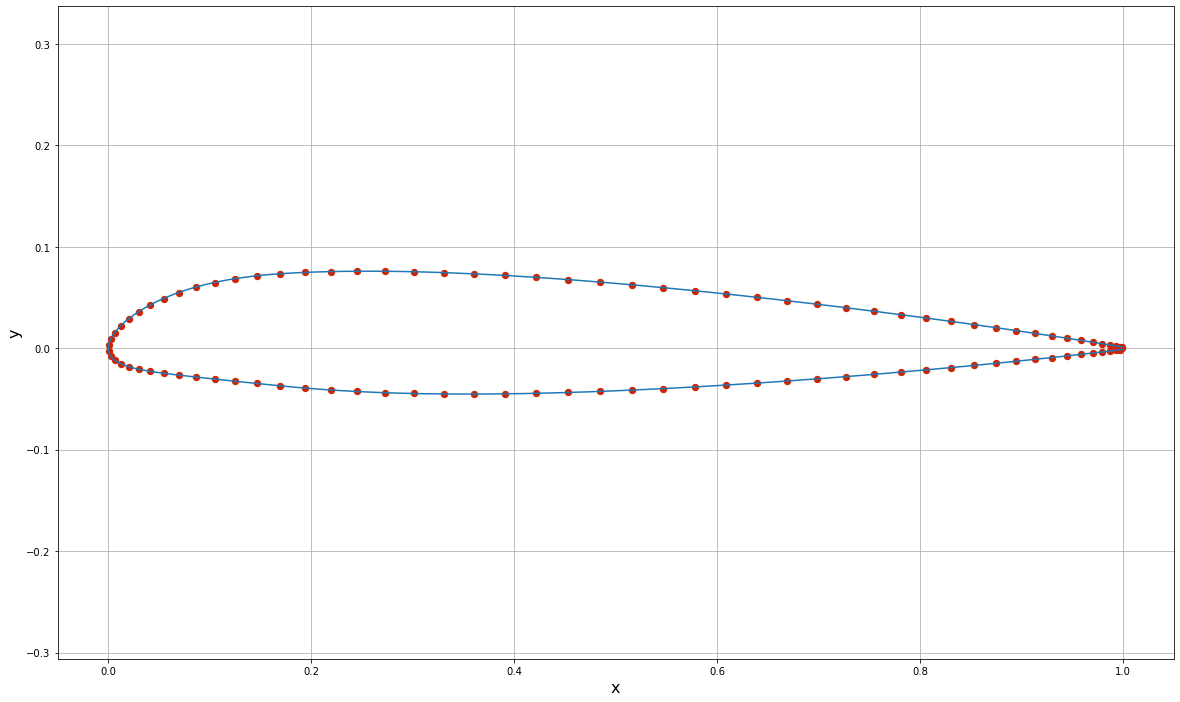

In [198]:
panels12 = define_panels(x12, z12, 100)

panels23 = define_panels(x23, z23, 100)


# Here, we define some panels using the x and y points and the number of panels we would like to use. 

# Lets plot these panels on the above plot. 
plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start, x_end)
#plt.ylim(y_start, y_end)
plt.plot(x23, z23)
plt.scatter([p.xc for p in panels23], [p.yc for p in panels23],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
plt.axis('equal')
plt.show()



Now that we can see our panels and how they are oriented, lets test our analyze panels function. Based on what we've written so far, we should have two matrices.

In [ ]:
analyze_panels(panels12, 1.5, 4.0)




sum of singularity strengths: 0.002694


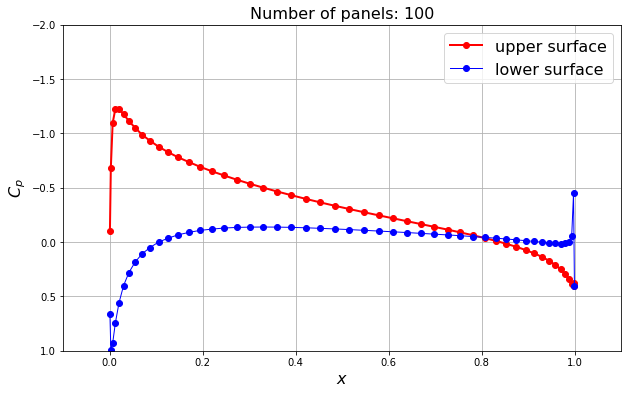

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'upper'],
            [panel.cp for panel in panels12 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'lower'],
            [panel.cp for panel in panels12 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.0, -2.0)
plt.title('Number of panels: {}'.format(panels12.size), fontsize=16);